In [1]:
import torch
import torch.nn as nn # 搭建神经网络
from torch.optim import SGD # 优化器SGD
import torch.utils.data as Data # 数据预处理

from sklearn.datasets import load_boston # 导入波士顿房价数据
from sklearn.preprocessing import StandardScaler # 数据标准化
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# 读入数据
boston_X, boston_y = load_boston(return_X_y=True)
print("boston_X.shape: ", boston_X.shape)

boston_X.shape:  (506, 13)


C:\Users\zefengli\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [12]:
boston_X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [13]:
boston_y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

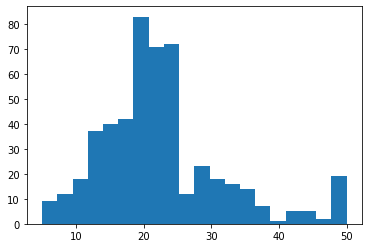

In [3]:
plt.figure()
plt.hist(boston_y, bins=20) # hist方法来绘制直方图
plt.show()

In [4]:
# 标准化数据
ss = StandardScaler(copy=True, with_mean=True, with_std=True)
boston_Xs = ss.fit_transform(boston_X)

In [5]:
# 将数据转化为张量
train_xt = torch.from_numpy(boston_Xs.astype(np.float32))
print(train_xt.size()) # 数据尺寸为(506, 13), 其中13为波士顿房价数据的特征数,
                       # 13将作神经网络的输入层神经单元个数
                       
train_yt = torch.from_numpy(boston_y.astype(np.float32))
print(train_yt.size())

torch.Size([506, 13])
torch.Size([506])


In [6]:
# 制作训练用数据，即关联数据，将输房价特征数据train_xt与房价数据train_y关联
train_data = Data.TensorDataset(train_xt, train_yt)
print(train_data[0: 5]) # 预览前5组数据 

# 定义一个数据加载器，用于批量加载训练用数据, 让数据分批次进入神经网络
train_loader = Data.DataLoader(dataset=train_data, 
                               batch_size=128,
                               shuffle=True,
                               num_workers=0)

(tensor([[-0.4198,  0.2848, -1.2879, -0.2726, -0.1442,  0.4137, -0.1200,  0.1402,
         -0.9828, -0.6666, -1.4590,  0.4411, -1.0756],
        [-0.4173, -0.4877, -0.5934, -0.2726, -0.7403,  0.1943,  0.3672,  0.5572,
         -0.8679, -0.9873, -0.3031,  0.4411, -0.4924],
        [-0.4173, -0.4877, -0.5934, -0.2726, -0.7403,  1.2827, -0.2658,  0.5572,
         -0.8679, -0.9873, -0.3031,  0.3964, -1.2087],
        [-0.4168, -0.4877, -1.3069, -0.2726, -0.8353,  1.0163, -0.8099,  1.0777,
         -0.7529, -1.1061,  0.1130,  0.4162, -1.3615],
        [-0.4125, -0.4877, -1.3069, -0.2726, -0.8353,  1.2286, -0.5112,  1.0777,
         -0.7529, -1.1061,  0.1130,  0.4411, -1.0265]]), tensor([24.0000, 21.6000, 34.7000, 33.4000, 36.2000]))


In [7]:
class MLPmodel(nn.Module):
    def __init__(self):
        super(MLPmodel, self).__init__()
        # First hidden layer
        self.h1 = nn.Linear(in_features = 13, out_features=30, bias=True)
        self.a1 = nn.ReLU()
        # Second hidden layer
        self.h2 = nn.Linear(in_features=30, out_features=10)
        self.a2 = nn.ReLU()
        # regression predict layer
        self.regression = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        x = self.h1(x)
        x = self.a1(x)
        x = self.h2(x)
        x = self.a2(x)
        output = self.regression(x)
        return output

In [9]:
mlp_1 = MLPmodel()  #网络转到GPU上计算
list(mlp_1.parameters())[0]   # 查看网络是否到GPU上
print(mlp_1)

MLPmodel(
  (h1): Linear(in_features=13, out_features=30, bias=True)
  (a1): ReLU()
  (h2): Linear(in_features=30, out_features=10, bias=True)
  (a2): ReLU()
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


In [10]:
optimizer = SGD(mlp_1.parameters(), lr=0.001) # 定义优化器 define Optimizer
loss_function = nn.MSELoss()    # 定义损失函数loss function

train_loss_all = [] # 存放每次迭代的误差数据，便于可视化训练过程

# Train
for epoch in range(60): # 迭代总轮数：50次
    # 对每个批次进行迭代计算
    for step, (b_x, b_y) in enumerate(train_loader):
        output = mlp_1(b_x).flatten()
        train_loss = loss_function(output, b_y) # 误差计算
        optimizer.zero_grad() # 梯度置位，或称梯度清零
        train_loss.backward() # 反向传播，计算梯度
        optimizer.step() # 梯度优化
        train_loss_all.append(train_loss.item())
    print("train epoch %d, loss %s:" % (epoch + 1, train_loss.item()))

train epoch 1, loss 556.8778686523438:
train epoch 2, loss 629.0133666992188:
train epoch 3, loss 539.4899291992188:
train epoch 4, loss 521.728271484375:
train epoch 5, loss 503.6838073730469:
train epoch 6, loss 531.8993530273438:
train epoch 7, loss 496.77520751953125:
train epoch 8, loss 343.5329895019531:
train epoch 9, loss 210.14515686035156:
train epoch 10, loss 103.17367553710938:
train epoch 11, loss 52.14960479736328:
train epoch 12, loss 28.248294830322266:
train epoch 13, loss 35.974796295166016:
train epoch 14, loss 34.317317962646484:
train epoch 15, loss 27.303600311279297:
train epoch 16, loss 14.256343841552734:
train epoch 17, loss 25.961841583251953:
train epoch 18, loss 19.395008087158203:
train epoch 19, loss 26.75493812561035:
train epoch 20, loss 21.611291885375977:
train epoch 21, loss 17.7252140045166:
train epoch 22, loss 20.367143630981445:
train epoch 23, loss 21.396732330322266:
train epoch 24, loss 17.9984130859375:
train epoch 25, loss 16.188724517822266

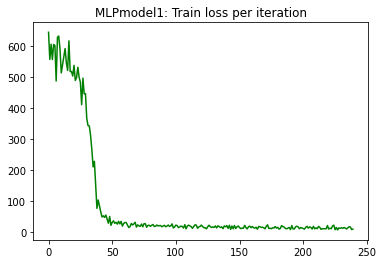

In [11]:
# 可视化训练过程（非动态）
plt.figure()
plt.plot(train_loss_all, "g-")
plt.title("MLPmodel1: Train loss per iteration")
plt.show()